# Pymaceuticals Inc.
---

### Analysis

- In given Sample data of 249 Mice and their tumor size data for Mice ID#g989 have duplicate records.
- "Capomulin" drug application was observed at many time points.
- Average Tumor Volume in MM3 for Capomulin treated Mice is second lowest.
- Mice that were treated are of almost in equal prportion in gender
- Final Tumor Volume in MM3 is great for Capomulin trated mice compared to other mice tumor volume trated with Ramicane, Infubinol, and Ceftamin
- Observed data have potential outliers for Capomulin and Ramicane
- Theere is positive correlation between mouse weight and the average tumor volume
- Overall "Capomulin" drug performance is better compared to others drug regimens
 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata,  how='left', on= 'Mouse ID')

# Display the data table for preview
mouse_study


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [90]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()


249

In [91]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint']) == True]['Mouse ID'].unique()


array(['g989'], dtype=object)

In [92]:
# Optional: Get all the data for the duplicate mouse ID.
lst = list(mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint']) == True]["Mouse ID"].unique())
mouse_study[mouse_study["Mouse ID"].isin(lst)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_study.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [94]:
# Checking the number of mice in the clean DataFrame.
len(mouse_clean["Mouse ID"].unique())

249

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Regimen_group = mouse_clean.groupby('Drug Regimen')
tumor_vol_by_Regimen_mean = Regimen_group['Tumor Volume (mm3)'].mean()
tumor_vol_by_Regimen_median = Regimen_group['Tumor Volume (mm3)'].median()
tumor_vol_by_Regimen_var = Regimen_group['Tumor Volume (mm3)'].var()
tumor_vol_by_Regimen_std = Regimen_group['Tumor Volume (mm3)'].std()
tumor_vol_by_Regimen_sem = Regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
                                'Mean Tumor Volume' : tumor_vol_by_Regimen_mean,
                                'Median Tumor Volume' : tumor_vol_by_Regimen_median,
                                'Tumor Volume Variance' : tumor_vol_by_Regimen_var,
                                'Tumor Volume Std. Dev.' : tumor_vol_by_Regimen_std,
                                'Tumor Volume Std. Err.' : tumor_vol_by_Regimen_sem
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [96]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = mouse_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
summary_stats_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

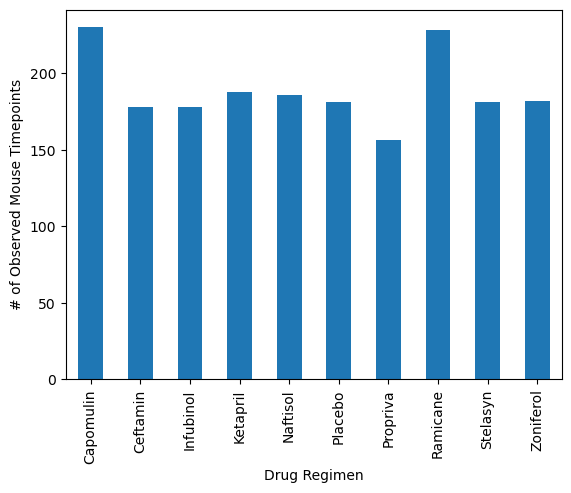

In [97]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_clean_drug = mouse_clean.groupby('Drug Regimen')["Mouse ID"].count()
mouse_clean_drug.plot(kind = 'bar', xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

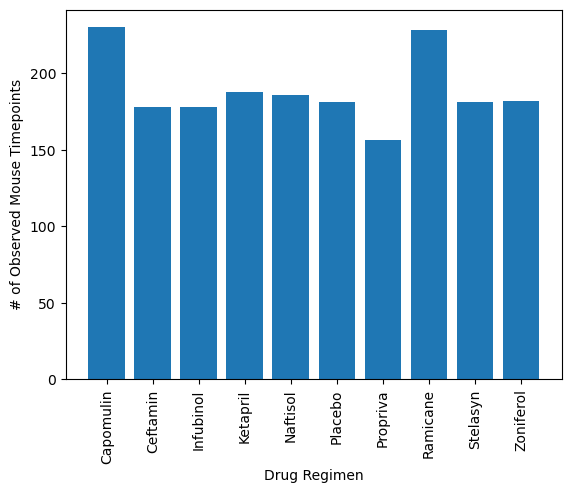

In [98]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_clean_grp_drug = mouse_clean.groupby("Drug Regimen")
y_axis = mouse_clean_grp_drug["Mouse ID"].count()
# x_axis = mouse_clean_grp_drug.groups.keys()
x_axis = y_axis.keys()
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, x_axis, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

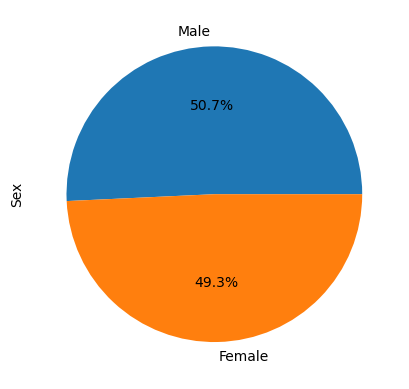

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distrubution = mouse_clean['Sex'].value_counts()
gender_pie = gender_distrubution.plot(kind= "pie",autopct="%1.1f%%")
gender_pie.set_ylabel('Sex')
plt.show()

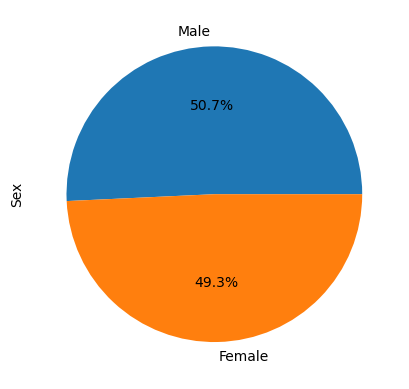

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(gender_distrubution.index)
plt.ylabel("Sex")
plt.pie(gender_distrubution, labels=labels,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [101]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_df = mouse_clean[mouse_clean["Drug Regimen"].isin(treatment)]
mouse_df_grpby = mouse_df.groupby("Mouse ID", as_index=False).max("Tumor Volume (mm3)")

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_df_grpby[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].rename(columns={"Timepoint":"Last Timepoint","Tumor Volume (mm3)":"Final Tumor Volume(mm3)"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_treatment = pd.merge(mouse_df,last_timepoint, how='left',on = "Mouse ID")
mouse_treatment

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Final Tumor Volume(mm3)
0,b128,0,45.000000,0,Capomulin,Female,9,22,45,45.651331
1,c326,0,45.000000,0,Infubinol,Female,18,25,5,45.000000
2,c139,0,45.000000,0,Infubinol,Male,11,28,45,72.226731
3,v339,0,45.000000,0,Infubinol,Male,20,26,5,46.250112
4,a577,0,45.000000,0,Infubinol,Female,6,25,30,57.031862
...,...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,45,46.910892
810,i177,45,33.562402,3,Ramicane,Male,10,18,45,45.000000
811,r944,45,41.581521,2,Capomulin,Male,12,25,45,47.373423
812,u364,45,31.023923,3,Capomulin,Male,18,17,45,47.212200


In [102]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
box_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows_by_drug = mouse_treatment[mouse_treatment["Drug Regimen"] == drug]
    tumor_vol_data = rows_by_drug["Tumor Volume (mm3)"]
#     tumor_vol_data = rows_by_drug["Final Tumor Volume(mm3)"]
    
    # add subset 
    box_data.append(tumor_vol_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_data[(tumor_vol_data<lower_bound) | (tumor_vol_data>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 703    25.472143
794    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 782    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


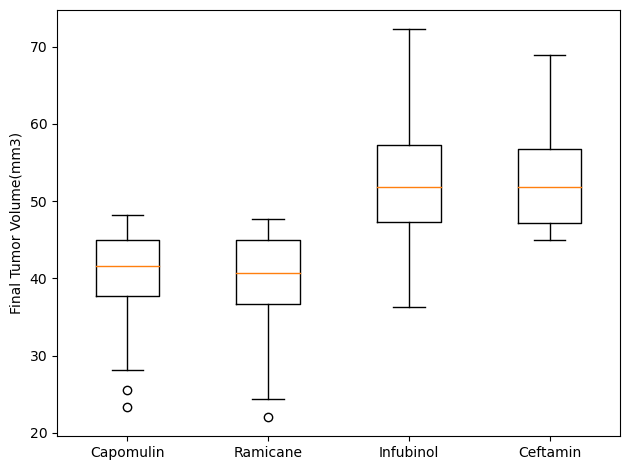

In [103]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume(mm3)")
ax.boxplot(box_data)
fig.tight_layout()
plt.xticks([1,2,3,4],treatments)
plt.show()

## Line and Scatter Plots

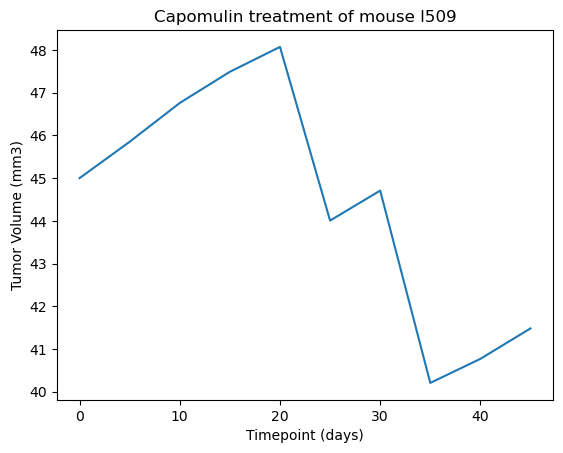

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = mouse_clean[(mouse_clean['Mouse ID'] == 'l509') & (mouse_clean['Drug Regimen'] == 'Capomulin')]

x_axis = mouse_l509['Timepoint']
y_axis = mouse_l509['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

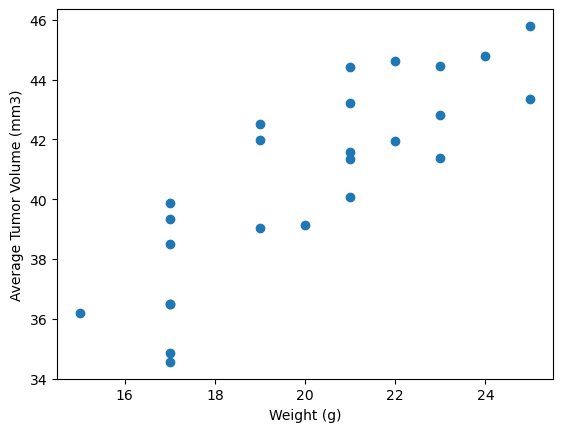

In [105]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mouse = mouse_clean[mouse_clean['Drug Regimen'] == 'Capomulin']
data_scatter =capomulin_mouse.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()
x_axis_scatter = [tup[1] for tup in data_scatter.keys()]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_axis_scatter, data_scatter)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


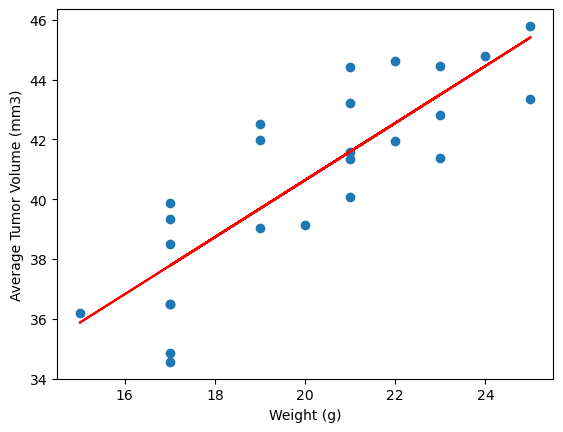

In [106]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis_scatter, data_scatter)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, data_scatter)
x_axis = [float(slope) * weight for weight in x_axis_scatter]
regress_values = [value + intercept for value in x_axis]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x_axis_scatter, data_scatter)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()